<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/pca-insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline

In [13]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')

In [14]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [15]:
X = df[['age', 'speed', 'miles']].values

In [16]:
import numpy as np
from sklearn.decomposition import PCA

In [17]:
import matplotlib.pyplot as plt

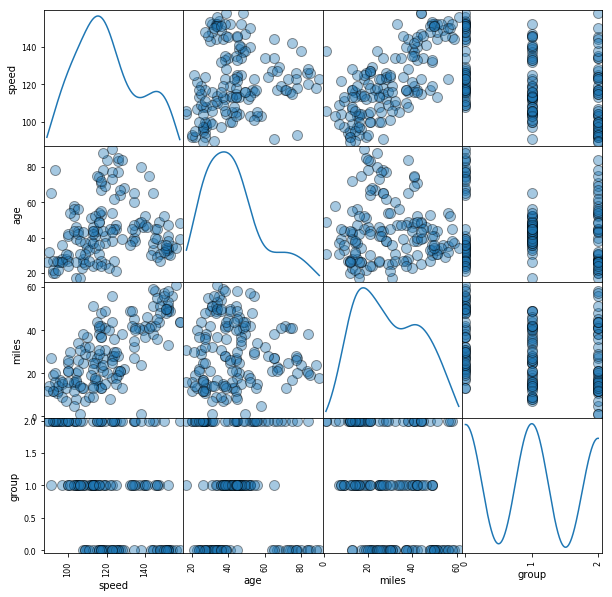

In [18]:
sample_df = df.sample(n=150, random_state=42)
plots = pd.plotting.scatter_matrix(sample_df, 
                           diagonal='kde', 
                           s=100, marker='o', edgecolors='k', alpha=0.4,
                           figsize=(10, 10))

In [19]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_

array([ 438.89707669,  293.66260097,  103.39083913])

In [21]:
# sum is 1, first pc has a very high variance, i.e. is very good, second could be deleted
pca.explained_variance_ratio_

array([ 0.52502758,  0.35129185,  0.12368057])

In [22]:
# impact of original features
# age, speed, miles
# pc1: speed and miles combined, 53% of explained variance
# pc2: just age, 35% explained variance
# pc3: similar to pc1, %12 explained variance
pcs = pca.components_
pcs

array([[ 0.08343915,  0.78448068,  0.61451442],
       [ 0.99328219, -0.01585696, -0.1146257 ],
       [-0.08017732,  0.6199505 , -0.78053378]])

## Lets reduce to two

In [23]:
# PCA?

In [24]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_points = pca.transform([[0, 0, 0], [100, 0, 0]])
x_points

array([[-118.5484108 ,  -39.24761574],
       [-110.20449607,   60.08060315]])

In [26]:
y_points = pca.transform([[0, 0, 0], [0, 160, 0]])
y_points

array([[-118.5484108 ,  -39.24761574],
       [   6.9684981 ,  -41.78472876]])

### Original data, speed/age with new coordinate system

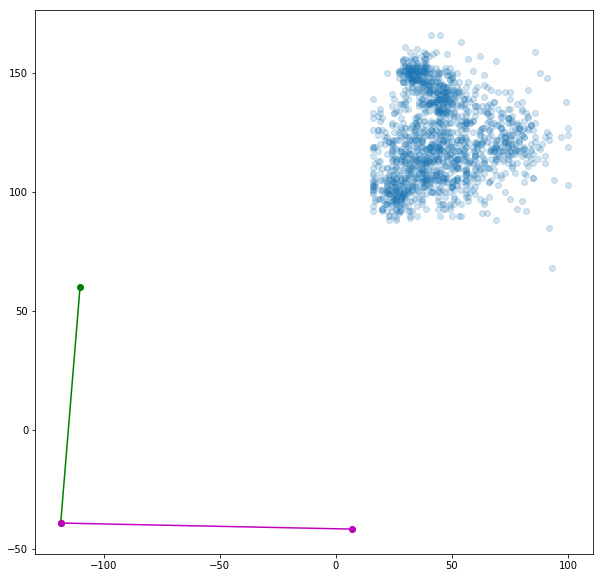

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.plot(x_points.transpose()[0], x_points.transpose()[1], 'go-')
plt.plot(y_points.transpose()[0], y_points.transpose()[1], 'mo-')

In [28]:
X_transformed = pca.transform(X)
X_transformed

array([[-22.63512116,   0.03717645],
       [ -6.72563049,   9.7674849 ],
       [ -8.4081472 , -19.07967465],
       ..., 
       [ 20.78407699,  -5.8694623 ],
       [-20.30732546, -13.25108301],
       [ -1.46257918,  10.4726423 ]])

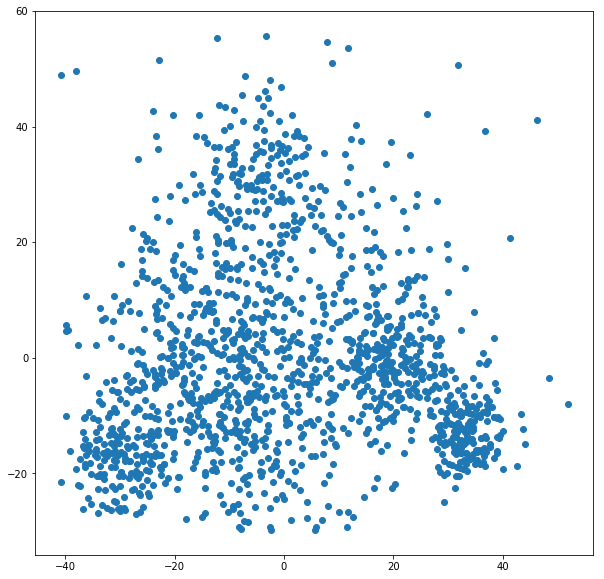

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

# Exercise: Experiment with other dimensionality reductions

1. Stick to PCA
   * Try all 3 features
   * Or, just use one feature
   * Find a way to plot 1 dimension or plot a subset of the 3 pcs to plot
1. Use UMAP
1. Use T-SNE